In [1]:
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_excel("people.xlsx")

In [2]:
df = df[pd.notnull(df['Biography'])] #remove all rows that do not have a biography

In [3]:
total = len(df)
firstGood = int(0.3*total) #1 if the founder is in the top 30 percent, 0 otherwise
labels = ["1" for i in range(firstGood)] + ["0" for i in range(total-firstGood)]
df['labels'] = labels #add labels as a new column to the dataframe

In [4]:
df = df.sample(frac=1).reset_index(drop=True) #shuffle the rows in the dataframe

In [5]:
bios = [bio.strip() for bio in df['Biography'].tolist()] #remove leading and ending white spaces
labels = df['labels'].tolist()

In [6]:
porter = PorterStemmer() #we want to stem the words
theBios = []

for i in range(0,len(bios)):
    bioWords = bios[i].split()
    bioWordsToUse = []
    for i in range(0,len(bioWords)): #go through each word in a bio
        bioWords[i] = re.sub(r'\W+', '', bioWords[i]) #only keep alphanumeric characters
        if bioWords[i] != '':
            bioWordsToUse.append(porter.stem(bioWords[i].lower())) #stem the words
    theBios.append(' '.join(bioWordsToUse))

In [7]:
vectorizer = TfidfVectorizer(stop_words="english") #removing stop words
x_Bios = vectorizer.fit_transform(theBios).toarray()

In [8]:
#in order to one hot encode we must give a 2d array

labels = [[labels[i]] for i in range(0,len(labels))]

ohe = OneHotEncoder()
y = ohe.fit_transform(labels).toarray() #one hot encoded versions of our outputs

/Users/chenthuransivanandan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [9]:
X_train,X_test,y_train,y_test = train_test_split(x_Bios,y,test_size = 0.4)

In [10]:
#Lets use 1 to 10 epochs and graph the results on our test set
epochs = [i for i in range(1,16)]
accuracies = []

for i in range(1,16):
    #building our neural network
    #Dependencies
    import keras
    from keras.models import Sequential
    from keras.layers import Dense
    # Neural network
    model = Sequential()
    model.add(Dense(16, input_dim=12609, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(12, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=i, batch_size=64) #fitting our model 

    y_pred = model.predict(X_test) #predicting the values from our test data
    #Converting predictions to label
    pred = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i])) #find what we predicted
    #Converting one hot encoded test label to label
    test = list()
    for i in range(len(y_test)):
        test.append(np.argmax(y_test[i])) #find what was suppose to be predicted
        
    a = accuracy_score(pred,test)*100 #get the accuracy
    accuracies.append(a)

Using TensorFlow backend.


Epoch 1/1
578/578 [==============================] - 0s 392us/step - loss: 0.6863 - accuracy: 0.6955
Epoch 1/2
578/578 [==============================] - 0s 398us/step - loss: 0.6853 - accuracy: 0.6990
Epoch 2/2
578/578 [==============================] - 0s 163us/step - loss: 0.6602 - accuracy: 0.7093
Epoch 1/3
578/578 [==============================] - 0s 385us/step - loss: 0.6911 - accuracy: 0.6592
Epoch 2/3
578/578 [==============================] - 0s 153us/step - loss: 0.6849 - accuracy: 0.7093
Epoch 3/3
578/578 [==============================] - 0s 149us/step - loss: 0.6780 - accuracy: 0.7093
Epoch 1/4
578/578 [==============================] - 0s 449us/step - loss: 0.6911 - accuracy: 0.6557
Epoch 2/4
578/578 [==============================] - 0s 154us/step - loss: 0.6790 - accuracy: 0.7093
Epoch 3/4
578/578 [==============================] - 0s 160us/step - loss: 0.6629 - accuracy: 0.7093
Epoch 4/4
578/578 [==============================] - 0s 152us/step - loss: 0.6407 - accurac

578/578 [==============================] - 0s 146us/step - loss: 0.5960 - accuracy: 0.7093
Epoch 4/13
578/578 [==============================] - 0s 136us/step - loss: 0.5502 - accuracy: 0.7093
Epoch 5/13
578/578 [==============================] - 0s 130us/step - loss: 0.4941 - accuracy: 0.7093
Epoch 6/13
578/578 [==============================] - 0s 133us/step - loss: 0.4246 - accuracy: 0.7093
Epoch 7/13
578/578 [==============================] - 0s 149us/step - loss: 0.3500 - accuracy: 0.7093
Epoch 8/13
578/578 [==============================] - 0s 141us/step - loss: 0.2841 - accuracy: 0.7353
Epoch 9/13
578/578 [==============================] - 0s 144us/step - loss: 0.2329 - accuracy: 0.9533
Epoch 10/13
578/578 [==============================] - 0s 137us/step - loss: 0.1982 - accuracy: 0.9965
Epoch 11/13
578/578 [==============================] - 0s 124us/step - loss: 0.1701 - accuracy: 1.0000
Epoch 12/13
578/578 [==============================] - 0s 122us/step - loss: 0.1431 - accur

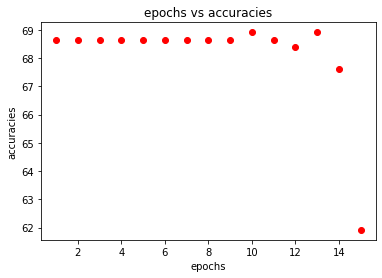

In [11]:
plt.plot(epochs, accuracies, 'ro')
#plt.axis([0, 6, 0, 20])
plt.xlabel('epochs')
plt.ylabel('accuracies')
plt.title("epochs vs accuracies")
plt.show()